In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import datasets, metrics, model_selection, svm
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [2]:
digits = datasets.load_digits()

In [3]:
target = digits.target
flatten_digits = digits.images.reshape((len(digits.images), -1))

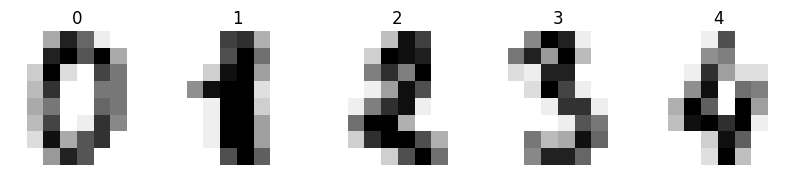

In [4]:
_, axes = plt.subplots(nrows=1, ncols=5, figsize=(10, 4))
for ax, image, label in zip(axes, digits.images, target):
    ax.set_axis_off()
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    ax.set_title(label)

In [5]:
X_train, X_test, y_train, y_test = train_test_split(
    flatten_digits, target, test_size=0.2)

In [6]:
scaler = StandardScaler()
X_train_logistic = scaler.fit_transform(X_train)
X_test_logistic = scaler.transform(X_test)

In [7]:
logit = LogisticRegression(
    C=0.01,
    penalty='l1',
    solver='saga',
    tol=0.1,
    multi_class='multinomial')
logit.fit(X_train_logistic, y_train)

LogisticRegression(C=0.01, multi_class='multinomial', penalty='l1',
                   solver='saga', tol=0.1)

In [8]:
y_pred_logistic = logit.predict(X_test_logistic)

In [9]:
print(f'Accuracy: {logit.score(X_test_logistic, y_test)}')

Accuracy: 0.8138888888888889


In [10]:
label_names = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
cmx = confusion_matrix(y_test, y_pred_logistic, labels=label_names)

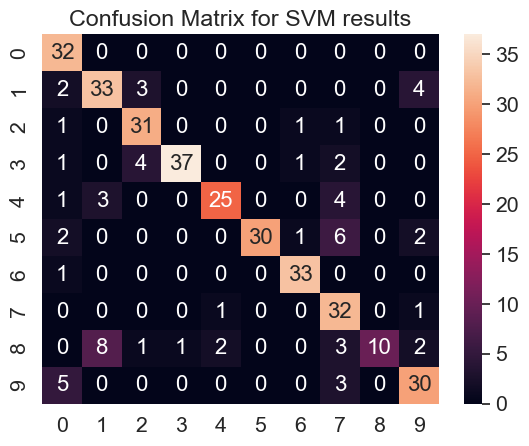

In [11]:
df_cm = pd.DataFrame(cmx)
# plt.figure(figsize=(10,7))
sns.set(font_scale=1.4)  # for label size
sns.heatmap(df_cm, annot=True, annot_kws={'size': 16})  # font size
plt.title('Confusion Matrix for SVM results')
plt.show()

In [12]:
svm_classifier = svm.SVC(gamma='scale')
svm_classifier.fit(X_train, y_train)

SVC()

In [13]:
y_pred_svm = svm_classifier.predict(X_test)

In [14]:
accuracy_score(y_test, y_pred_svm)

0.9972222222222222

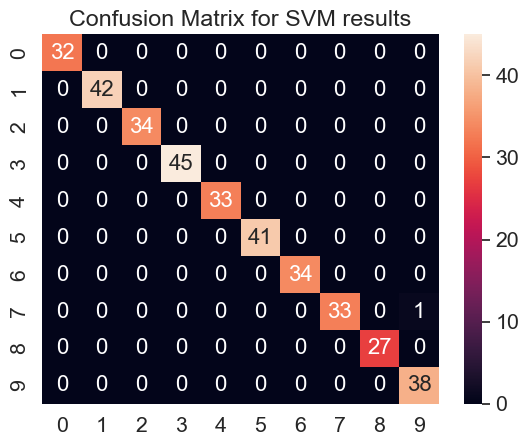

In [15]:
label_names = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
cmx = confusion_matrix(y_test, y_pred_svm, labels=label_names)
df_cm = pd.DataFrame(cmx)
# plt.figure(figsize=(10,7))
sns.set(font_scale=1.4) # for label size
sns.heatmap(df_cm, annot=True, annot_kws={'size': 16}) # font size
plt.title('Confusion Matrix for SVM results')
plt.show()

In [17]:
algorithm = []
algorithm.append(('SVM', svm_classifier))
algorithm.append(('Logistic_L1', logit))
algorithm.append(
    ('Logistic_L2', 
     LogisticRegression(
         C=0.01, 
         penalty='l2', 
         solver='saga', 
         tol=0.1, 
         multi_class='multinomial')))
results = []
names = []
y = digits.target
for name, algo in algorithm:
    k_fold = model_selection.KFold(
        n_splits=10, random_state=10, shuffle=True)
    if name == 'SVM':
        X = flatten_digits
        cv_results = model_selection.cross_val_score(
            algo, X, y, cv=k_fold, scoring='accuracy')
    else:
        scaler = StandardScaler()
        X = scaler.fit_transform(flatten_digits)
        cv_results = model_selection.cross_val_score(
            algo, X, y, cv=k_fold, scoring='accuracy')
    results.append(cv_results)
    names.append(name)

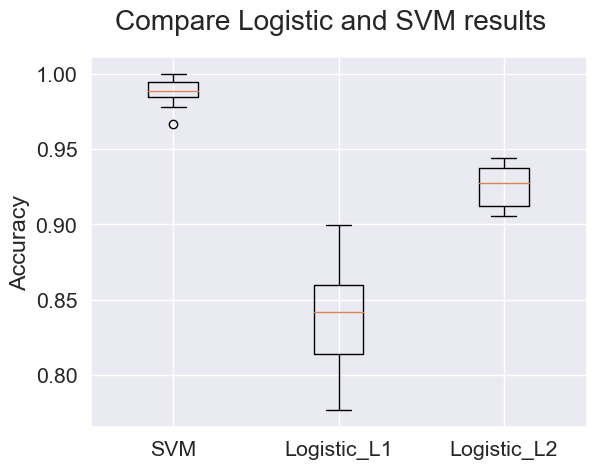

In [18]:
fig = plt.figure()
fig.suptitle('Compare Logistic and SVM results')
ax = fig.add_subplot()
plt.boxplot(results)
plt.ylabel('Accuracy')
ax.set_xticklabels(names)
plt.show()